In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot defaults
sns.set()                       # sets default plot style
sns.set_context("paper")        # sets default plot context
plt.rc('figure', figsize=(16,8))# sets default figure size
plt.rc('font', size=16)         # controls default text sizes
plt.rc('axes', titlesize=18)    # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc(['xtick', 'ytick'], labelsize=12)   # fontsize of the tick labels
plt.rc('legend', fontsize=14, title_fontsize= 14, loc='best')   # fontsize of the legend labels

# Read files with training dataset and cancer labels into pandas DataFrames
file = 'cardio_train.csv'
data = pd.read_csv(file, sep=';', header=0, index_col=0)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [3]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# Convert 'age' units from days to years
data['age'] = round((data['age'] / 365), 2)

# Convert 'height' units from cm to m
data['height'] = data['height']/100

# Add column that calculates BMI (body mass index)
data['BMI'] = round((data['weight'] / data['height']**2), 1)

# Convert gender to categorical datatype and rename categories 'F' and 'M'
data.gender = data.gender.astype('category')
data.gender.cat.rename_categories(['F', 'M'], inplace=True)

data.ap_hi = data.ap_hi.astype('float')

data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
id,,,,,,,,,,,,,
0,50.39,M,1.68,62.0,110.0,80,1,1,0,0,1,0,22.0
1,55.42,F,1.56,85.0,140.0,90,3,1,0,0,1,1,34.9
2,51.66,F,1.65,64.0,130.0,70,3,1,0,0,0,1,23.5
3,48.28,M,1.69,82.0,150.0,100,1,1,0,0,1,1,28.7
4,47.87,F,1.56,56.0,100.0,60,1,1,0,0,0,0,23.0


In [5]:
data.describe()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339349,1.643592,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.555311
std,6.759573,0.082101,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.092596
min,29.580000,0.550000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.500000
25%,48.390000,1.590000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.900000
50%,53.980000,1.650000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.400000
75%,58.430000,1.700000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.200000
max,64.970000,2.500000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.700000


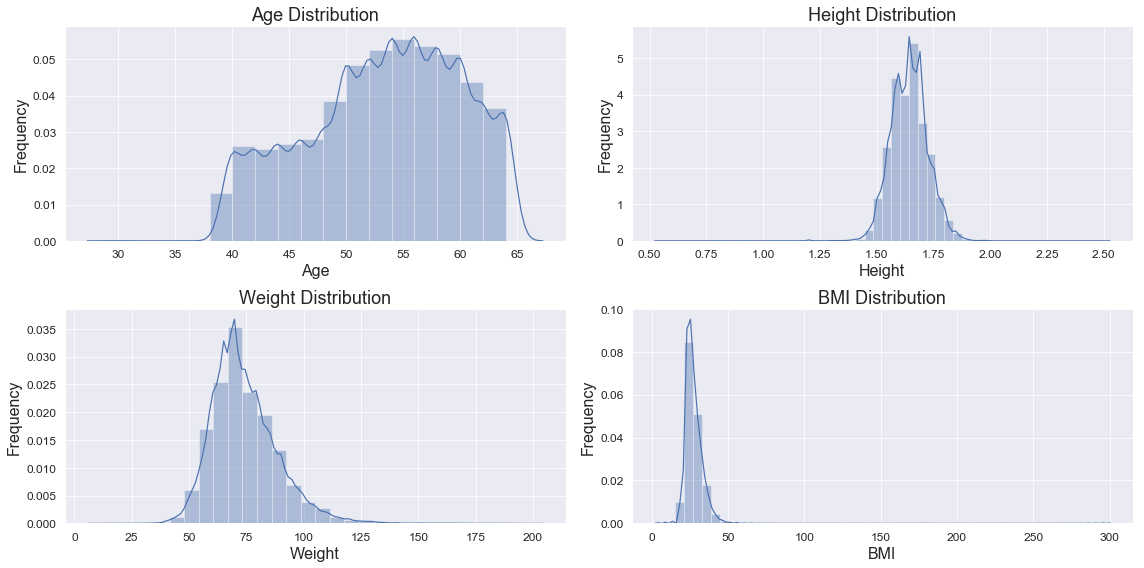

In [6]:
# Plot histograms of age, height, weight, and BMI
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
bin_edges = range(28,66,2)
sns.distplot(data.age, bins=bin_edges)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.subplot(2,2,2)
sns.distplot(data.height)
plt.title("Height Distribution")
plt.xlabel("Height")
plt.ylabel("Frequency")

plt.subplot(2,2,3)
sns.distplot(data.weight, bins=30)
plt.title("Weight Distribution")
plt.xlabel("Weight")
plt.ylabel("Frequency")

plt.subplot(2,2,4)
sns.distplot(data.BMI)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")

plt.tight_layout()
plt.savefig(fname='images\histograms_pre-filter.png', dpi='figure', format='png', bbox_inches='tight', pad_inches=0.1)
plt.show()

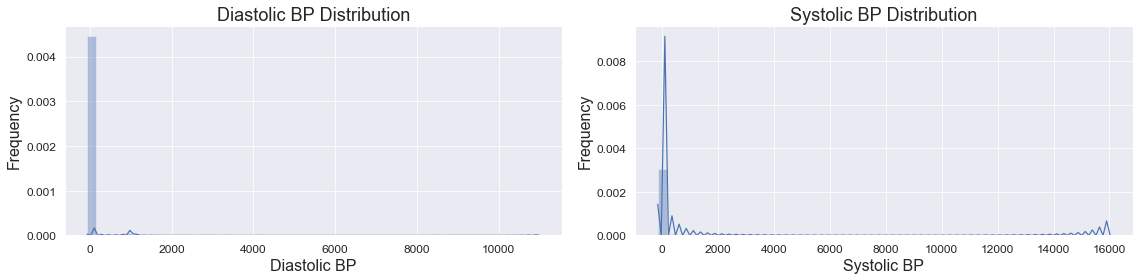

In [7]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.distplot(data.ap_lo)
plt.title("Diastolic BP Distribution")
plt.xlabel("Diastolic BP")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
sns.distplot(data.ap_hi)
plt.title("Systolic BP Distribution")
plt.xlabel("Systolic BP")
plt.ylabel("Frequency")

plt.tight_layout()
plt.savefig(fname='images\BPhistograms_pre-filter.png', dpi='figure', format='png', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [8]:
data.sort_values(by=['ap_lo'], axis=0, ascending=False).head(15)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
id,,,,,,,,,,,,,
61901,63.62,F,1.60,105.0,200.0,11000,1,1,0,0,1,1,41.0
97907,52.22,F,1.66,70.0,160.0,10000,2,1,0,0,1,1,25.4
3352,57.52,M,1.86,105.0,140.0,10000,1,1,0,0,1,1,30.4
34098,49.59,M,1.69,86.0,150.0,10000,2,2,0,1,1,1,30.1
62058,60.02,M,1.79,62.0,130.0,9800,1,1,0,0,1,0,19.4
9482,53.50,F,1.62,69.0,130.0,9100,1,1,0,0,1,1,26.3
47030,50.23,F,1.56,65.0,150.0,9011,2,2,0,0,1,1,26.7
17260,58.81,M,1.69,78.0,130.0,9011,1,1,1,1,1,1,27.3
22832,39.75,M,1.79,70.0,120.0,8500,1,1,0,0,1,0,21.8


In [9]:
data.sort_values(by=['ap_hi'], axis=0).head(35)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
id,,,,,,,,,,,,,
50055,63.90,M,1.68,59.0,-150.0,80,1,1,0,0,1,1,20.9
34295,50.14,F,1.62,74.0,-140.0,90,1,1,0,0,1,1,28.2
66571,64.78,M,1.60,59.0,-120.0,80,1,1,0,0,0,0,23.0
36025,40.30,M,1.68,50.0,-120.0,80,2,1,0,0,0,1,17.7
22881,60.57,M,1.61,90.0,-115.0,70,1,1,0,0,1,0,34.7
29313,42.69,F,1.53,54.0,-100.0,70,1,1,0,0,1,0,23.1
6525,41.87,F,1.65,78.0,-100.0,80,2,1,0,0,1,0,28.7
12494,46.32,M,1.63,63.0,1.0,2088,1,1,1,0,1,0,23.7
60477,51.28,F,1.71,80.0,1.0,1088,1,1,0,0,1,1,27.4


In [10]:
data.sort_values(by='height', axis=0).tail()
print(data.height.max())
print(data[data.height > 2].sort_values(by='height', axis=0))

2.5
         age gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                            
30894  52.20      M    2.07    78.0  100.0     70            1     1      0   
9223   58.14      F    2.50    86.0  140.0    100            3     1      0   

       alco  active  cardio   BMI  
id                                 
30894     1       1       0  18.2  
9223      0       1       1  13.8  


In [11]:
# Filter out height outliers
df = data[(data.height >= 1.2) & (data.height <= 2.1)]

# Filter out abnormal blood pressure readings
df = df[(df.ap_hi < 300) & (df.ap_hi > 50) & (df.ap_lo > 20) & (df.ap_lo < 300)]

# Filter out BMI outliers
df = df[(df.BMI > 10)]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68726 entries, 0 to 99999
Data columns (total 13 columns):
age            68726 non-null float64
gender         68726 non-null category
height         68726 non-null float64
weight         68726 non-null float64
ap_hi          68726 non-null float64
ap_lo          68726 non-null int64
cholesterol    68726 non-null int64
gluc           68726 non-null int64
smoke          68726 non-null int64
alco           68726 non-null int64
active         68726 non-null int64
cardio         68726 non-null int64
BMI            68726 non-null float64
dtypes: category(1), float64(5), int64(7)
memory usage: 6.9 MB
None


In [12]:
df.sort_values(by='age', axis=0).tail(25)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
id,,,,,,,,,,,,,
23482,64.82,F,1.60,65.0,130.0,80,3,3,0,0,0,1,25.4
65803,64.84,F,1.59,58.0,120.0,60,1,1,0,0,1,1,22.9
38903,64.84,F,1.70,66.0,110.0,70,1,1,0,0,0,1,22.8
65017,64.84,F,1.56,75.0,100.0,80,1,1,0,0,0,0,30.8
40813,64.84,M,1.66,89.0,160.0,100,1,1,0,0,1,1,32.3
79874,64.84,F,1.60,70.0,120.0,90,1,1,0,1,1,0,27.3
31758,64.84,M,1.70,91.0,130.0,90,1,1,0,0,1,0,31.5
37815,64.84,F,1.69,80.0,120.0,80,1,1,0,0,1,0,28.0
13961,64.84,M,1.65,70.0,120.0,80,1,1,0,0,0,0,25.7


In [13]:
df_grouped = df.groupby(['cardio']).describe().transpose()
df_grouped

cardio                   0             1
age    count  34714.000000  34012.000000
       mean      51.724306     54.963948
       std        6.774203      6.343708
       min       29.580000     39.110000
       25%       46.130000     50.380000
       50%       52.070000     55.850000
       75%       57.180000     60.010000
       max       64.870000     64.970000
height count  34714.000000  34012.000000
       mean       1.645060      1.643188
       std        0.078278      0.080033
       min        1.200000      1.200000
       25%        1.590000      1.590000
       50%        1.650000      1.650000
       75%        1.700000      1.700000
       max        2.070000      1.980000
weight count  34714.000000  34012.000000
       mean      71.570925     76.719946
       std       13.261340     14.836424
       min       28.000000     30.000000
       25%       63.000000     66.000000
       50%       70.000000     75.000000
       75%       79.000000     85.000000
       max      200.000000    200.000000
ap_hi  count  34714.000000  34012.000000
       mean     119.562712    133.815742
       std       12.628681     17.385864
       min       60.000000     70.000000
       25%      110.000000    120.000000
       50%      120.000000    130.000000
...                    ...           ...
smoke  std        0.289854      0.276375
       min        0.000000      0.000000
       25%        0.000000      0.000000
       50%        0.000000      0.000000
       75%        0.000000      0.000000
       max        1.000000      1.000000
alco   count  34714.000000  34012.000000
       mean       0.055424      0.051805
       std        0.228810      0.221637
       min        0.000000      0.000000
       25%        0.000000      0.000000
       50%        0.000000      0.000000
       75%        0.000000      0.000000
       max        1.000000      1.000000
active count  34714.000000  34012.000000
       mean       0.818085      0.788310
       std        0.385780      0.408512
       min        0.000000      0.000000
       25%        1.000000      1.000000
       50%        1.000000      1.000000
       75%        1.000000      1.000000
       max        1.000000      1.000000
BMI    count  34714.000000  34012.000000
       mean      26.471133     28.464654
       std        4.807713      5.501049
       min       12.900000     10.700000
       25%       23.400000     24.500000
       50%       25.500000     27.400000
       75%       28.800000     31.500000
       max       68.300000    108.200000

[88 rows x 2 columns]

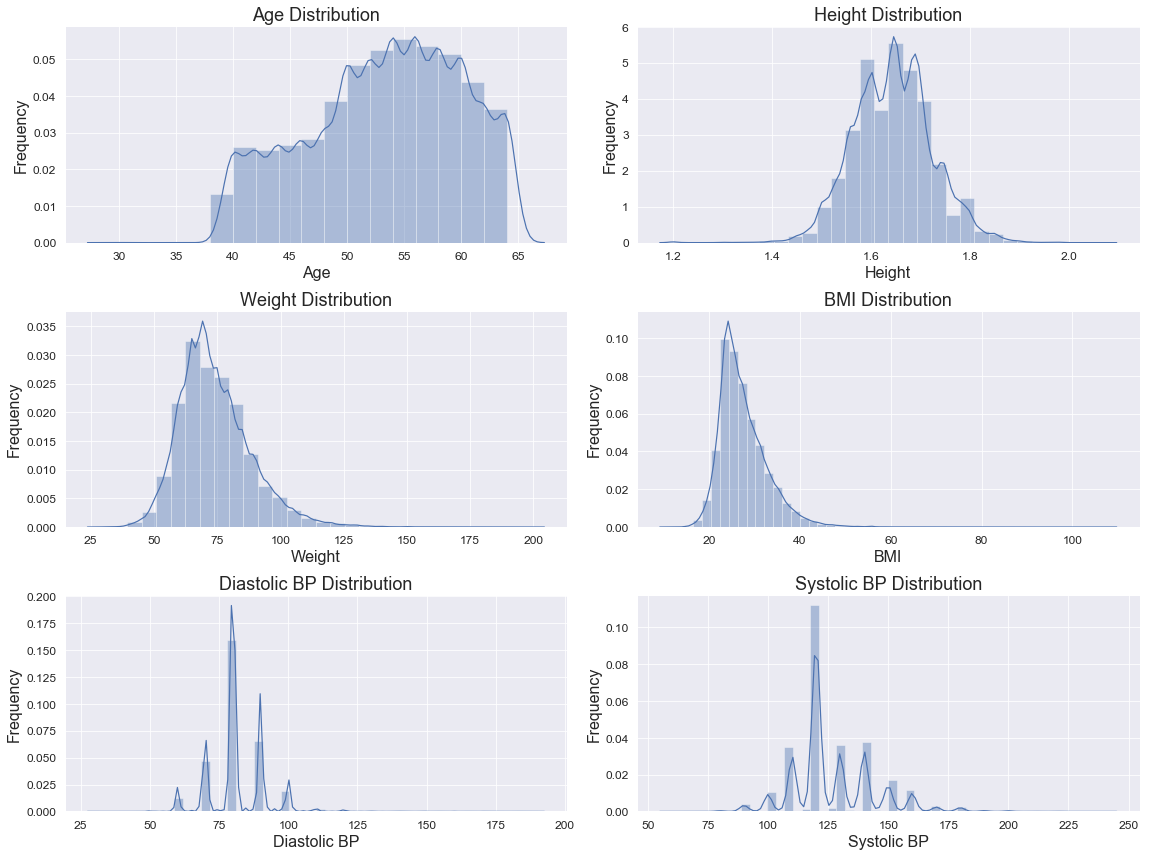

In [14]:
plt.figure(figsize=(16,12))

plt.subplot(3,2,1)
sns.distplot(df.age, bins=bin_edges)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.subplot(3,2,2)
sns.distplot(df.height, bins=30)
plt.title("Height Distribution")
plt.xlabel("Height")
plt.ylabel("Frequency")

plt.subplot(3,2,3)
sns.distplot(df.weight, bins=30)
plt.title("Weight Distribution")
plt.xlabel("Weight")
plt.ylabel("Frequency")

plt.subplot(3,2,4)
sns.distplot(df.BMI)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")

plt.subplot(3,2,5)
sns.distplot(df.ap_lo)
plt.title("Diastolic BP Distribution")
plt.xlabel("Diastolic BP")
plt.ylabel("Frequency")

plt.subplot(3,2,6)
sns.distplot(df.ap_hi)
plt.title("Systolic BP Distribution")
plt.xlabel("Systolic BP")
plt.ylabel("Frequency")

plt.tight_layout()
plt.savefig(fname='images\histograms_post-filter.png', dpi='figure', format='png', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [15]:
df.shape

(68726, 13)

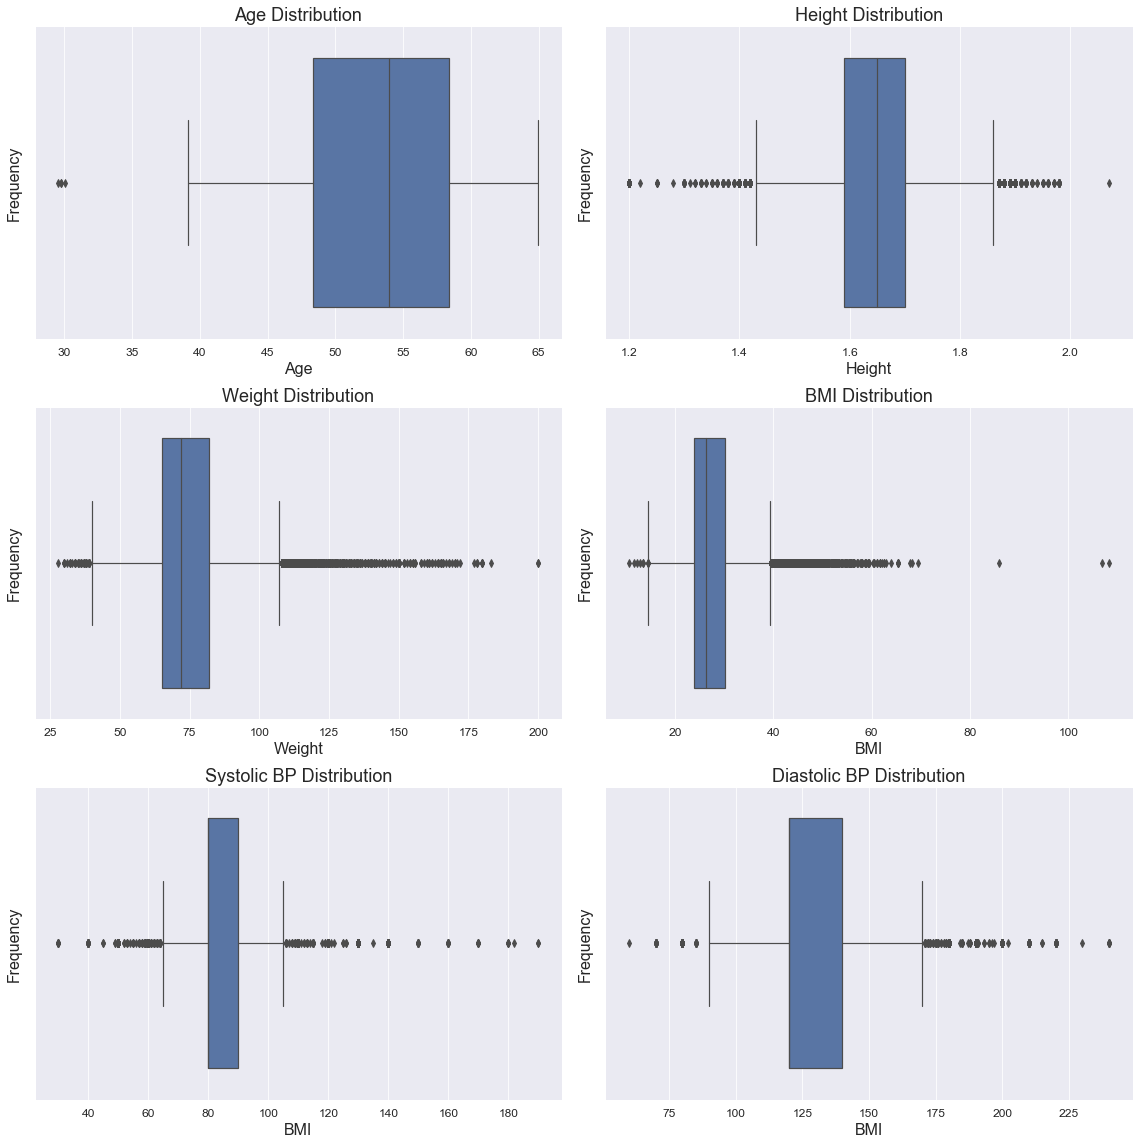

In [16]:
plt.figure(figsize=(16,16))

plt.subplot(3,2,1)
sns.boxplot(df.age)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.subplot(3,2,2)
sns.boxplot(df.height)
plt.title("Height Distribution")
plt.xlabel("Height")
plt.ylabel("Frequency")

plt.subplot(3,2,3)
sns.boxplot(df.weight)
plt.title("Weight Distribution")
plt.xlabel("Weight")
plt.ylabel("Frequency")

plt.subplot(3,2,4)
sns.boxplot(df.BMI)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")

plt.subplot(3,2,5)
sns.boxplot(df.ap_lo)
plt.title("Systolic BP Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")

plt.subplot(3,2,6)
sns.boxplot(df.ap_hi)
plt.title("Diastolic BP Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

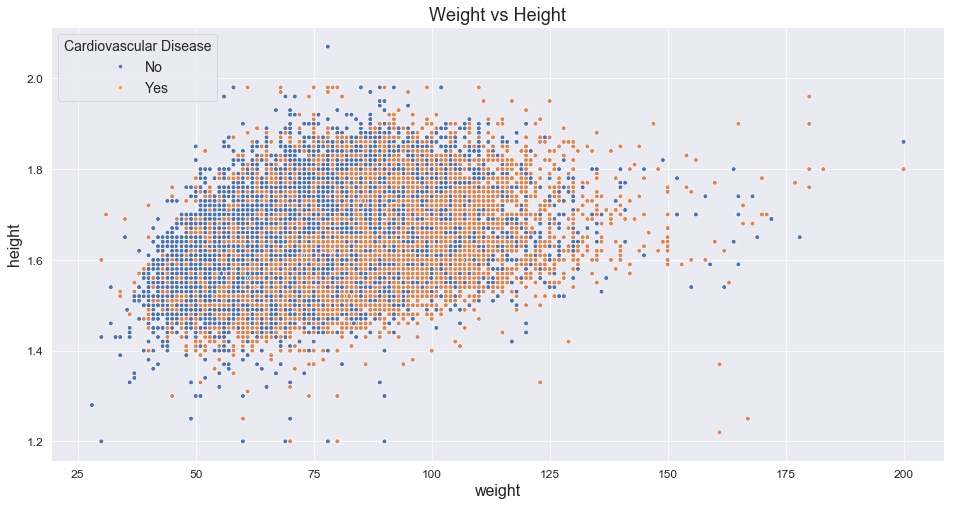

In [17]:
from matplotlib.lines import Line2D

CVD = df[(df['cardio'] == 1)]
noCVD = df[(df['cardio'] == 0)]

plt.figure(figsize=(16,8))
sns.scatterplot(x=df.weight, y=df.height, hue=df.cardio, marker='o')
plt.title('Weight vs Height')
custom = [Line2D([], [], marker='.', color='b', linestyle='None'),
          Line2D([], [], marker='.', color='orange', linestyle='None')]
plt.legend(custom, ['No', 'Yes'], title='Cardiovascular Disease')
plt.show()

Weight vs. Height, no CVD: y = 0.002x + 1.5
Weight vs. Height, with CVD: y = 0.0016x + 1.52


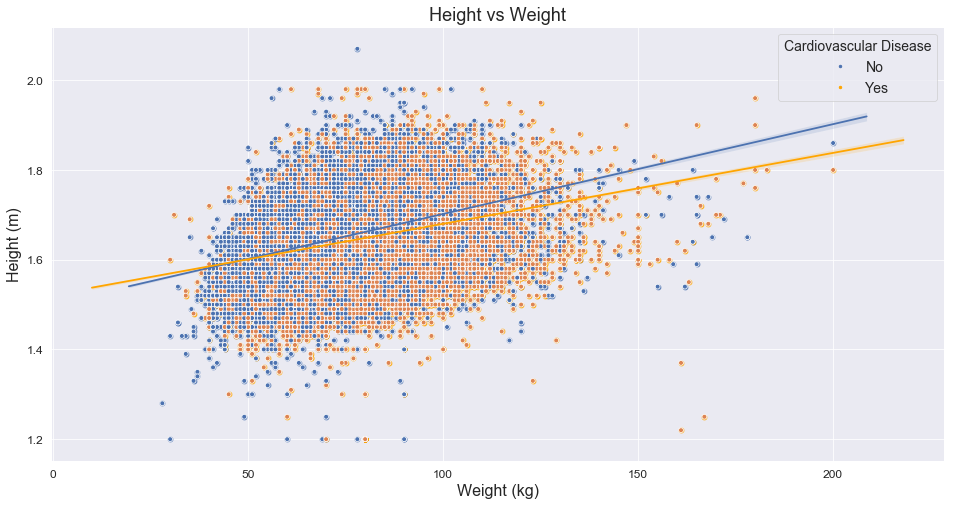

In [18]:
# Compute the linear regressions
slope_noCVD, intercept_noCVD = np.polyfit(noCVD.weight,noCVD.height, 1)
slope_CVD, intercept_CVD = np.polyfit(CVD.weight, CVD.height, 1)

noCVD_equation = 'y = {}x + {}'.format(round(slope_noCVD, 4), round(intercept_noCVD, 2))
CVD_equation = 'y = {}x + {}'.format(round(slope_CVD, 4), round(intercept_CVD, 2)) 

print("Weight vs. Height, no CVD: y = {}x + {}".format(round(slope_noCVD, 4), round(intercept_noCVD, 2)))
print("Weight vs. Height, with CVD: y = {}x + {}".format(round(slope_CVD, 4), round(intercept_CVD, 2)))

# Plot weight vs. height colored by cardiovascular disease state with linear regression lines
plt.figure(figsize=(16,8))
sns.regplot(x=noCVD.weight, y=noCVD.height, color='b', label=noCVD_equation)
sns.regplot(x=CVD.weight, y=CVD.height, color='orange', label=CVD_equation)
sns.scatterplot(x=df.weight, y=df.height, hue=df.cardio, marker='o')
plt.title('Height vs Weight')
custom = [Line2D([], [], marker='.', color='b', linestyle='None'),
          Line2D([], [], marker='.', color='orange', linestyle='None')]
plt.legend(custom, ['No', 'Yes'], title='Cardiovascular Disease')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (m)')
plt.savefig(fname='images\weight_vs_height.png', dpi='figure', format='png', bbox_inches='tight', pad_inches=0.1)
plt.show()

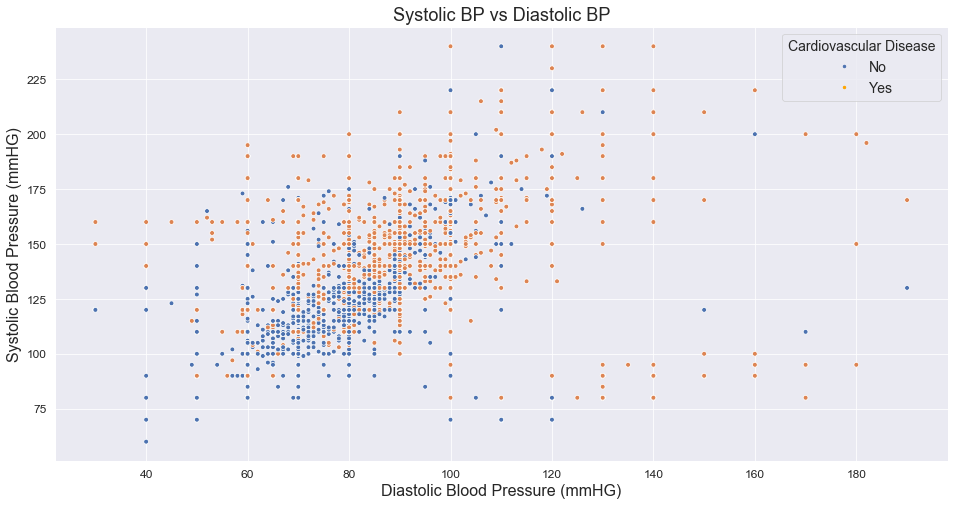

In [19]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=df.ap_lo, y=df.ap_hi, hue=df.cardio, marker='o')
plt.title('Systolic BP vs Diastolic BP')
custom = [Line2D([], [], marker='.', color='b', linestyle='None'),
          Line2D([], [], marker='.', color='orange', linestyle='None')]
plt.legend(custom, ['No', 'Yes'], title='Cardiovascular Disease')
plt.xlabel('Diastolic Blood Pressure (mmHG)')
plt.ylabel('Systolic Blood Pressure (mmHG)')
plt.savefig(fname='images\systolic_vs_diastolic.png', dpi='figure', format='png', bbox_inches='tight', pad_inches=0.1)
plt.show()

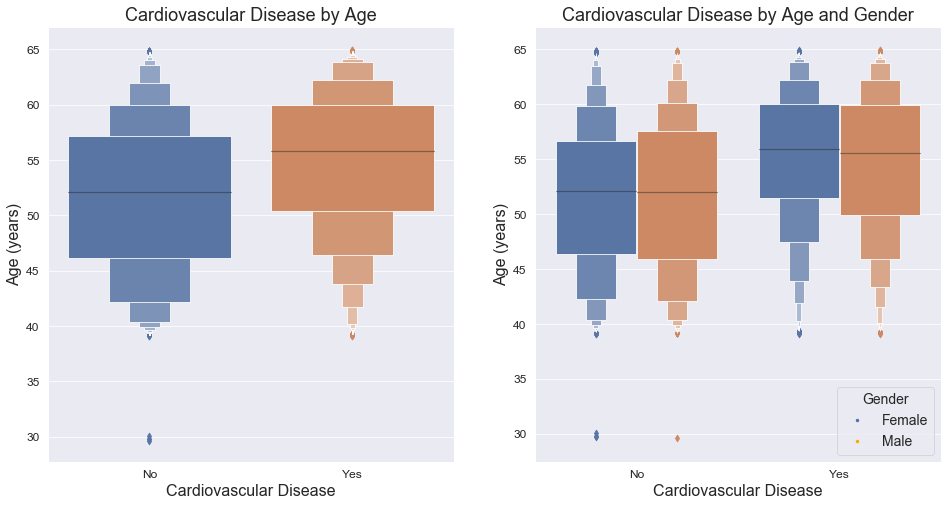

In [20]:
fig, axs = plt.subplots(1,2, figsize=(16,8))

plt.subplot(1,2,1)
sns.boxenplot(x='cardio', y='age', data=df)
plt.title('Cardiovascular Disease by Age')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Age (years)')

plt.subplot(1,2,2)
sns.boxenplot(x='cardio', y='age', hue='gender', data=df)
plt.title('Cardiovascular Disease by Age and Gender')
plt.legend(custom, ['Female', 'Male'], title='Gender', loc='best')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Age (years)')

plt.savefig(fname='images\cvd_age.png', dpi='figure', format='png', bbox_inches='tight', pad_inches=0.1)
plt.show()

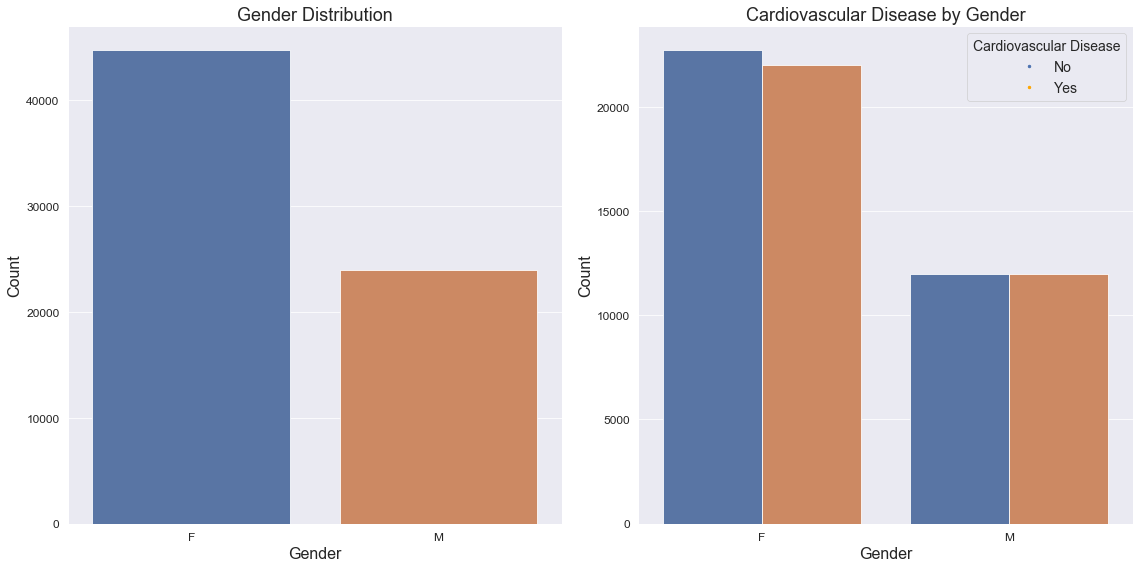

gender
F    44758
M    23968
Name: gender, dtype: int64


In [21]:
fig, axs = plt.subplots(1,2, figsize=(16,8))

plt.subplot(1,2,1)
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.xlabel('Gender')

plt.subplot(1,2,2)
sns.countplot(x='gender', hue='cardio', data=df)
plt.title('Cardiovascular Disease by Gender')
plt.legend(custom, ['No', 'Yes'], title='Cardiovascular Disease')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(fname='images\gender_age.png', dpi='figure', format='png', bbox_inches='tight', pad_inches=0.1)
plt.show()
print(df.groupby('gender').gender.count())

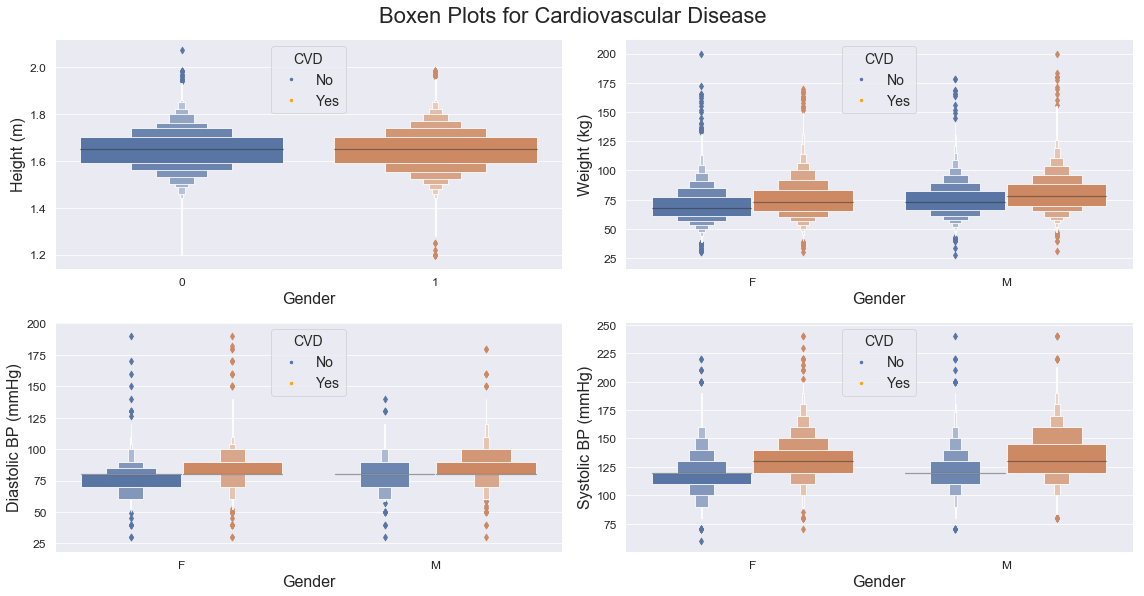

In [22]:
fig, axs = plt.subplots(2,2, figsize=(16,8))
fig.suptitle("Boxen Plots for Cardiovascular Disease", y=1.03, fontsize=22)

plt.subplot(2,2,1)
sns.boxenplot(x="cardio", y="height", data=df)
plt.xlabel('Gender')
plt.ylabel('Height (m)')
plt.legend(custom, ['No', 'Yes'], title='CVD', loc='upper center')

plt.subplot(2,2,2)
sns.boxenplot(x="gender", y="weight", hue="cardio", data=df)
plt.xlabel('Gender')
plt.ylabel('Weight (kg)')
plt.legend(custom, ['No', 'Yes'], title='CVD', loc='upper center')

plt.subplot(2,2,3)
sns.boxenplot(x="gender", y="ap_lo", hue="cardio", data=df)
plt.xlabel('Gender')
plt.ylabel('Diastolic BP (mmHg)')
plt.legend(custom, ['No', 'Yes'], title='CVD', loc='upper center')

plt.subplot(2,2,4)
sns.boxenplot(x="gender", y="ap_hi", hue="cardio", data=df)
plt.xlabel('Gender')
plt.ylabel('Systolic BP (mmHg)')
plt.legend(custom, ['No', 'Yes'], title='CVD', loc='upper center')

plt.tight_layout()
plt.show()

In [23]:
# Determine the number of patients with BMI greater or equal to 40
high_BMI = df[df.BMI >= 40].copy()
high_BMI.sort_values(by=['BMI'], inplace=True, ascending=False)
high_BMI.shape

(1786, 13)

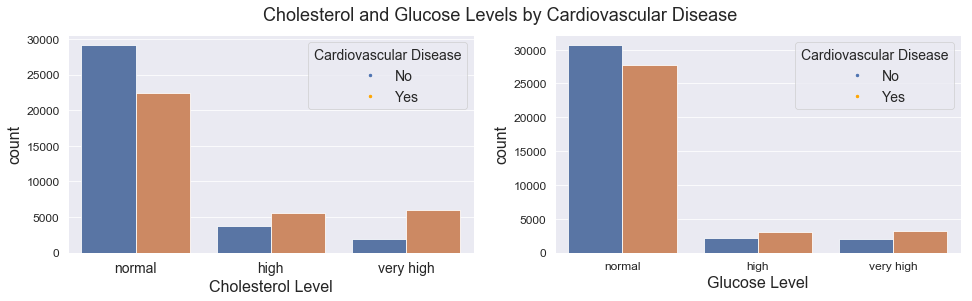

In [24]:
fig, axs = plt.subplots(1,2, figsize=(16,4))
fig.suptitle("Cholesterol and Glucose Levels by Cardiovascular Disease", fontsize=18)

plt.subplot(1,2,1)
sns.countplot(x='cholesterol', hue='cardio', data=df)
plt.legend(custom, ['No', 'Yes'], title='Cardiovascular Disease', loc='best')
plt.xticks(ticks=range(3), labels=['normal', 'high', 'very high'], fontsize=14)
plt.xlabel('Cholesterol Level')

plt.subplot(1,2,2)
sns.countplot(x='gluc', hue='cardio', data=df)
plt.legend(custom, ['No', 'Yes'], title='Cardiovascular Disease', loc='best')
plt.xticks(ticks=range(3), labels=['normal', 'high', 'very high'])
plt.xlabel('Glucose Level')

plt.tight_layout
plt.savefig(fname='images\chol_glucose_cvd.png', dpi='figure', format='png', bbox_inches='tight', pad_inches=0.1)
plt.show()

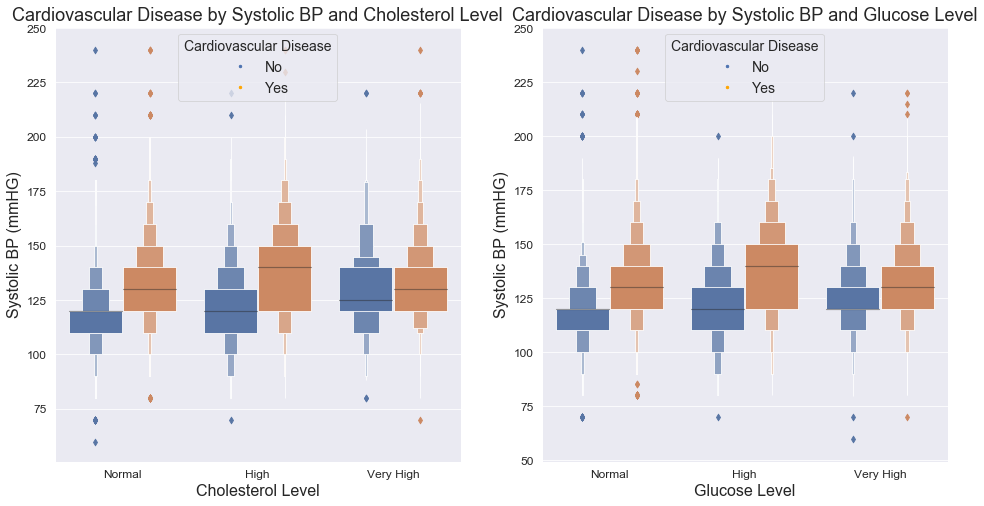

In [25]:
fig, axs = plt.subplots(1,2, figsize=(16, 8))

plt.subplot(1,2,1)
sns.boxenplot(x='cholesterol', y='ap_hi', hue='cardio', data=df)
plt.title('Cardiovascular Disease by Systolic BP and Cholesterol Level')
plt.legend(custom, ['No', 'Yes'], title='Cardiovascular Disease', loc='upper center')
plt.xticks(ticks=[0, 1, 2], labels=['Normal', 'High', 'Very High'])
plt.xlabel('Cholesterol Level')
plt.ylabel('Systolic BP (mmHG)')

plt.subplot(1,2,2)
sns.boxenplot(x='gluc', y='ap_hi', hue='cardio', data=df)
plt.title('Cardiovascular Disease by Systolic BP and Glucose Level')
plt.legend(custom, ['No', 'Yes'], title='Cardiovascular Disease', loc='upper center')
plt.xticks(ticks=[0, 1, 2], labels=['Normal', 'High', 'Very High'])
plt.xlabel('Glucose Level')
plt.ylabel('Systolic BP (mmHG)')

plt.savefig(fname='images\chol_glucose_BP.png', dpi='figure', format='png', bbox_inches='tight', pad_inches=0.1)
plt.show()

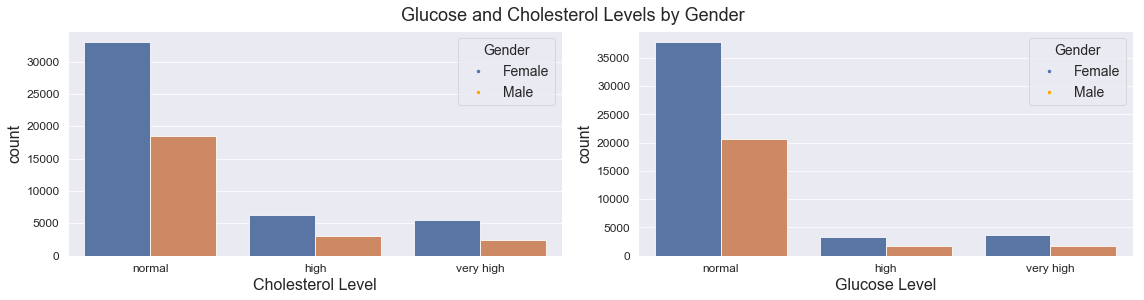

In [26]:
fig, axs = plt.subplots(1,2, figsize=(16,4))
fig.suptitle("Glucose and Cholesterol Levels by Gender", y=1.03, fontsize=18)

plt.subplot(1,2,1)
sns.countplot(x='cholesterol', hue='gender', data=df)
plt.legend(custom, ['Female', 'Male'], title='Gender', loc='best')
plt.xticks(ticks=range(3), labels=['normal', 'high', 'very high'])
plt.xlabel('Cholesterol Level')

plt.subplot(1,2,2)
sns.countplot(x='gluc', hue='gender', data=df)
plt.legend(custom, ['Female', 'Male'], title='Gender', loc='best')
plt.xticks(ticks=range(3), labels=['normal', 'high', 'very high'])
plt.xlabel('Glucose Level')

plt.tight_layout()
plt.show()

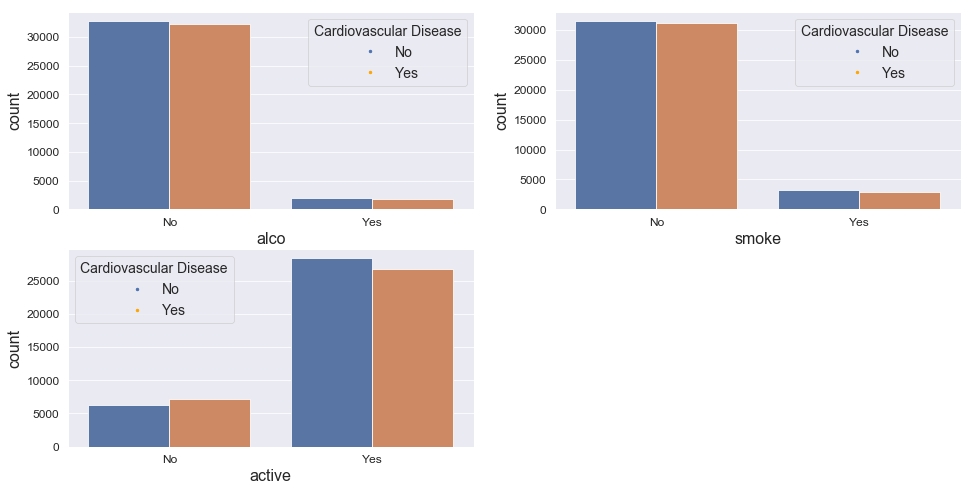

In [27]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.countplot(x='alco', hue='cardio', data=df)
plt.legend(custom, ['No', 'Yes'], title='Cardiovascular Disease', loc='best')
plt.xticks(ticks=range(2), labels=['No', 'Yes'])

plt.subplot(2,2,2)
sns.countplot(x='smoke', hue='cardio', data=df)
plt.legend(custom, ['No', 'Yes'], title='Cardiovascular Disease', loc='best')
plt.xticks(ticks=range(2), labels=['No', 'Yes'])

plt.subplot(2,2,3)
sns.countplot(x='active', hue='cardio', data=df)
plt.legend(custom, ['No', 'Yes'], title='Cardiovascular Disease', loc='best')
plt.xticks(ticks=range(2), labels=['No', 'Yes'])
plt.savefig(fname='images\self-reported_count.png', dpi='figure', format='png', bbox_inches='tight', pad_inches=0.1)
plt.show()

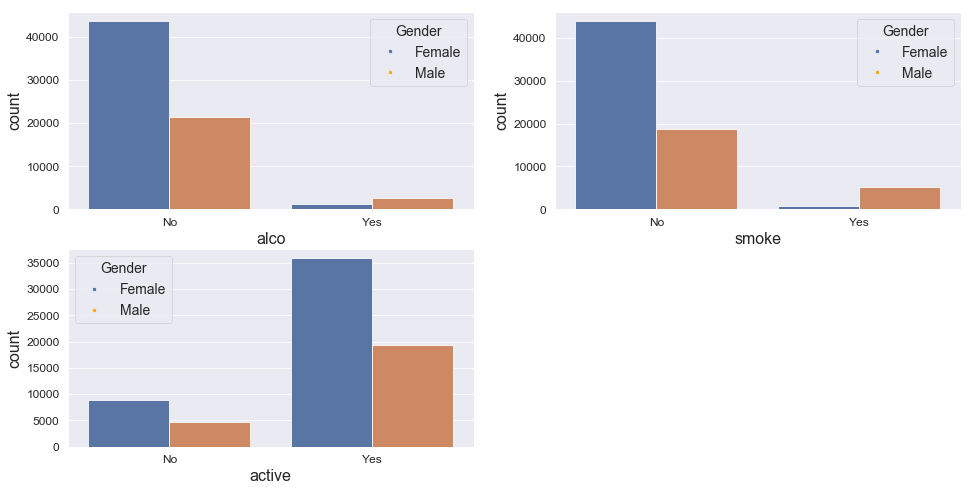

In [28]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.countplot(x='alco', hue='gender', data=df)
plt.legend(custom, ['Female', 'Male'], title='Gender', loc='best')
plt.xticks(ticks=range(2), labels=['No', 'Yes'])

plt.subplot(2,2,2)
sns.countplot(x='smoke', hue='gender', data=df)
plt.legend(custom, ['Female', 'Male'], title='Gender', loc='best')
plt.xticks(ticks=range(2), labels=['No', 'Yes'])

plt.subplot(2,2,3)
sns.countplot(x='active', hue='gender', data=df)
plt.legend(custom, ['Female', 'Male'], title='Gender', loc='best')
plt.xticks(ticks=range(2), labels=['No', 'Yes'])

plt.show()

34012 34012
34714 34714


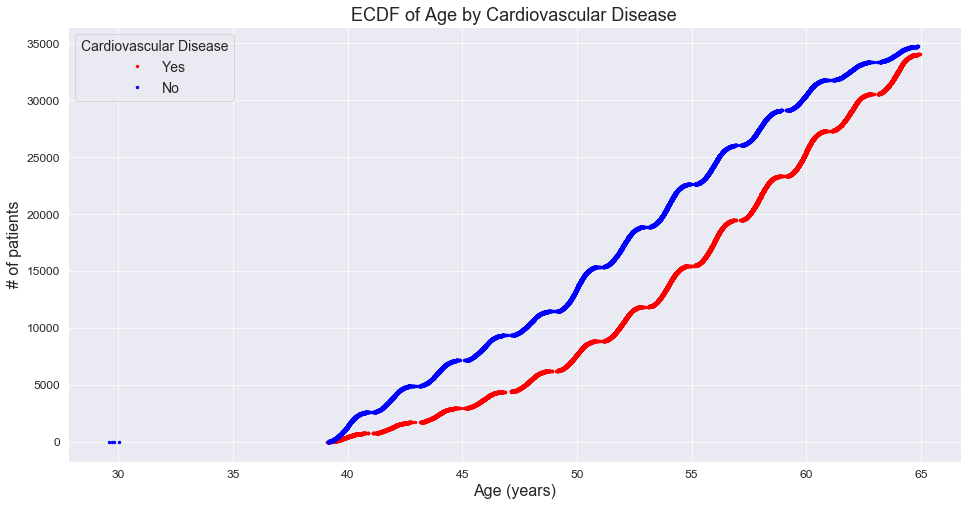

In [29]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points
    n = len(data)
    # x-data for the ECDF
    x = np.sort(data)
    # y-data for the ECDF
    y = np.arange(1, n+1)
    print(n, y[-1])
    return x, y

CVD_age = df[(df['cardio'] == 1)]['age']
noCVD_age = df[(df['cardio'] == 0)]['age']

CVD_age_x, CVD_age_y = ecdf(CVD_age)
noCVD_age_x, noCVD_age_y = ecdf(noCVD_age)

plt.figure(figsize=(16, 8))
plt.plot(CVD_age_x, CVD_age_y, marker='.', linestyle='none', label='Yes', color='red')
plt.plot(noCVD_age_x, noCVD_age_y, marker='.', linestyle='none', label='No', color='blue')
plt.xlabel('Age (years)')
plt.ylabel('# of patients')
plt.title('ECDF of Age by Cardiovascular Disease')
plt.legend(title='Cardiovascular Disease')
plt.savefig(fname='images\ECDF_age.png', dpi='figure', format='png', bbox_inches='tight', pad_inches=0.1)
plt.show()

34012 34012
34714 34714


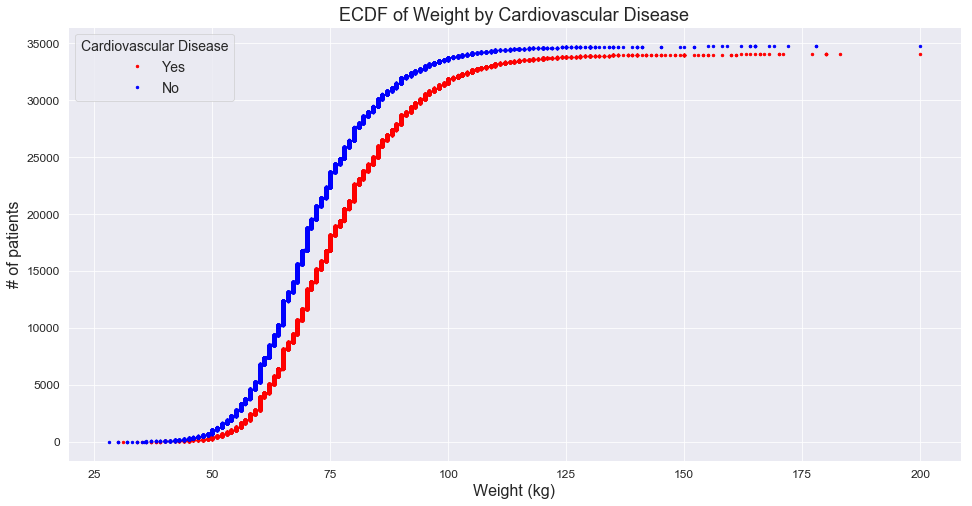

In [30]:
CVD_weight = df[(df['cardio'] == 1)]['weight']
noCVD_weight = df[(df['cardio'] == 0)]['weight']

CVD_weight_x, CVD_weight_y = ecdf(CVD_weight)
noCVD_weight_x, noCVD_weight_y = ecdf(noCVD_weight)

plt.figure(figsize=(16, 8))
plt.plot(CVD_weight_x, CVD_weight_y, marker='.', linestyle='none', label='Yes', color='red')
plt.plot(noCVD_weight_x, noCVD_weight_y, marker='.', linestyle='none', label='No', color='blue')
plt.xlabel('Weight (kg)')
plt.ylabel('# of patients')
plt.title('ECDF of Weight by Cardiovascular Disease')
plt.legend(title='Cardiovascular Disease')
plt.savefig(fname='images\ECDF_weight.png', dpi='figure', format='png', bbox_inches='tight', pad_inches=0.1)
plt.show()

34012 34012
34714 34714


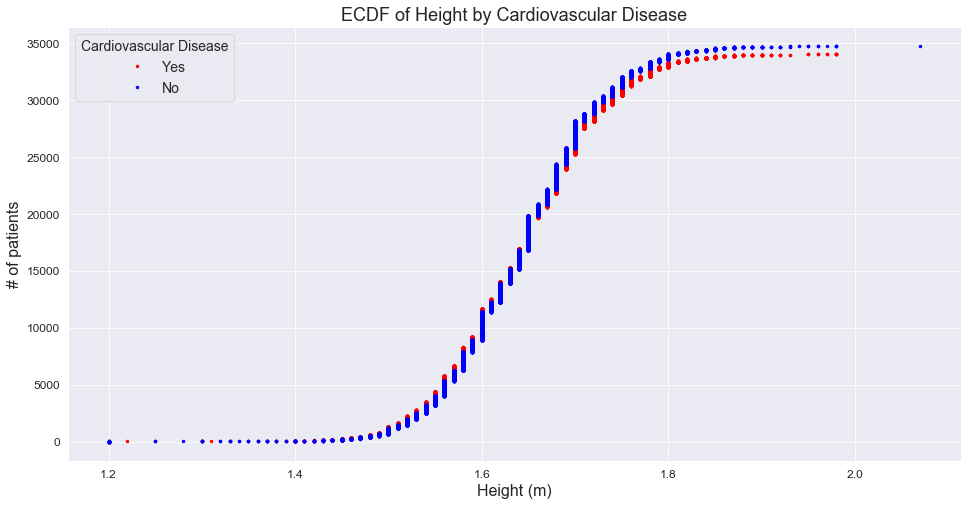

In [31]:
CVD_height = df[(df['cardio'] == 1)]['height']
noCVD_height = df[(df['cardio'] == 0)]['height']

CVD_height_x, CVD_height_y = ecdf(CVD_height)
noCVD_height_x, noCVD_height_y = ecdf(noCVD_height)

plt.figure(figsize=(16, 8))
plt.plot(CVD_height_x, CVD_height_y, marker='.', linestyle='none', label='Yes', color='red')
plt.plot(noCVD_height_x, noCVD_height_y, marker='.', linestyle='none', label='No', color='blue')
plt.xlabel('Height (m)')
plt.ylabel('# of patients')
plt.title('ECDF of Height by Cardiovascular Disease')
plt.legend(title='Cardiovascular Disease')
plt.savefig(fname='images\ECDF_height.png', dpi='figure', format='png', bbox_inches='tight', pad_inches=0.1)
plt.show()

34012 34012
34714 34714


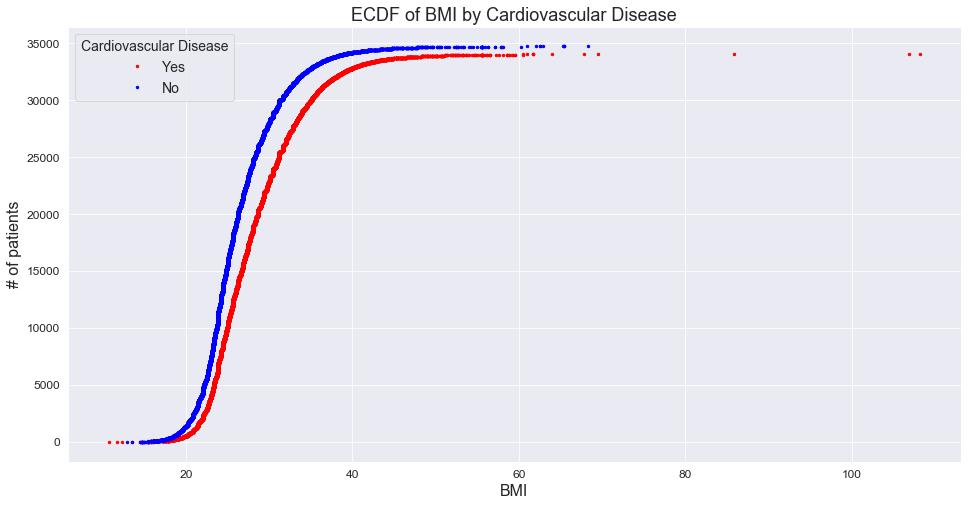

In [32]:
CVD_bmi = df[(df['cardio'] == 1)]['BMI']
noCVD_bmi = df[(df['cardio'] == 0)]['BMI']

CVD_bmi_x, CVD_bmi_y = ecdf(CVD_bmi)
noCVD_bmi_x, noCVD_bmi_y = ecdf(noCVD_bmi)

plt.figure(figsize=(16, 8))
plt.plot(CVD_bmi_x, CVD_bmi_y, marker='.', linestyle='none', label='Yes', color='red')
plt.plot(noCVD_bmi_x, noCVD_bmi_y, marker='.', linestyle='none', label='No', color='blue')
plt.xlabel('BMI')
plt.ylabel('# of patients')
plt.title('ECDF of BMI by Cardiovascular Disease')
plt.legend(title='Cardiovascular Disease')
plt.savefig(fname='images\ECDF_BMI.png', dpi='figure', format='png', bbox_inches='tight', pad_inches=0.1)
plt.show()

34012 34012
34714 34714


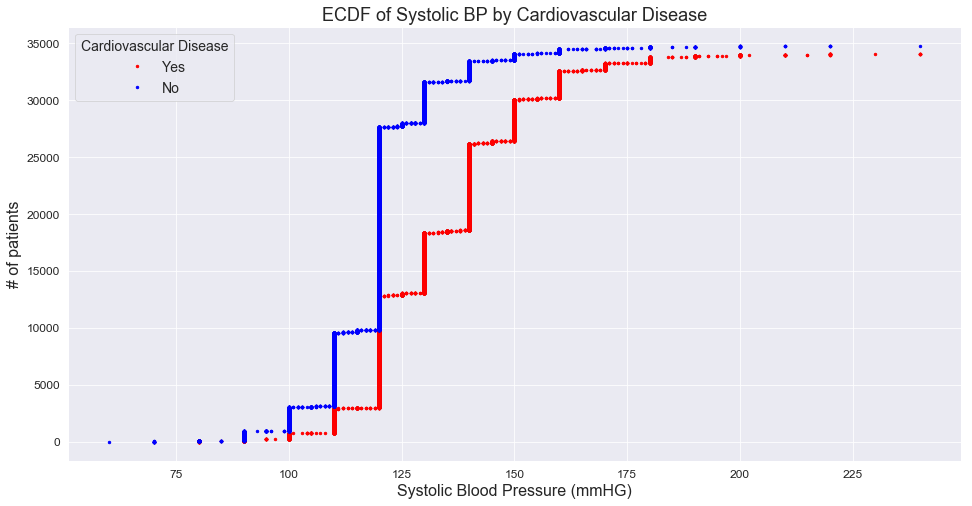

In [33]:
CVD_ap_hi = df[(df['cardio'] == 1)]['ap_hi']
noCVD_ap_hi = df[(df['cardio'] == 0)]['ap_hi']

CVD_ap_hi_x, CVD_ap_hi_y = ecdf(CVD_ap_hi)
noCVD_ap_hi_x, noCVD_ap_hi_y = ecdf(noCVD_ap_hi)

plt.figure(figsize=(16, 8))
plt.plot(CVD_ap_hi_x, CVD_ap_hi_y, marker='.', linestyle='none', label='Yes', color='red')
plt.plot(noCVD_ap_hi_x, noCVD_ap_hi_y, marker='.', linestyle='none', label='No', color='blue')
plt.xlabel('Systolic Blood Pressure (mmHG)')
plt.ylabel('# of patients')
plt.title('ECDF of Systolic BP by Cardiovascular Disease')
plt.legend(title='Cardiovascular Disease')
plt.savefig(fname='images\ECDF_systolic.png', dpi='figure', format='png', bbox_inches='tight', pad_inches=0.1)
plt.show()

34012 34012
34714 34714


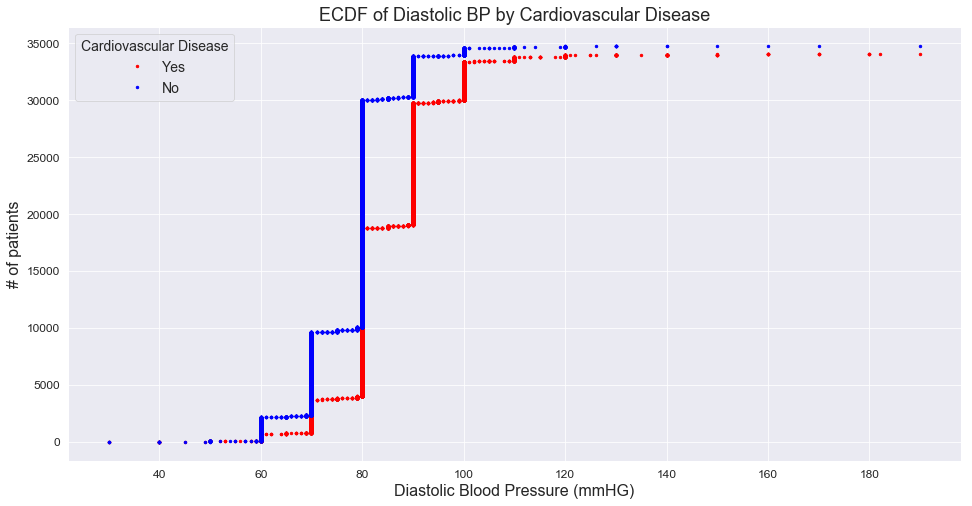

In [34]:
CVD_ap_lo = df[(df['cardio'] == 1)]['ap_lo']
noCVD_ap_lo = df[(df['cardio'] == 0)]['ap_lo']

CVD_ap_lo_x, CVD_ap_lo_y = ecdf(CVD_ap_lo)
noCVD_ap_lo_x, noCVD_ap_lo_y = ecdf(noCVD_ap_lo)

plt.figure(figsize=(16, 8))
plt.plot(CVD_ap_lo_x, CVD_ap_lo_y, marker='.', linestyle='', label='Yes', color='red')
plt.plot(noCVD_ap_lo_x, noCVD_ap_lo_y, marker='.', linestyle='none', label='No', color='blue')
plt.xlabel('Diastolic Blood Pressure (mmHG)')
plt.ylabel('# of patients')
plt.title('ECDF of Diastolic BP by Cardiovascular Disease')
plt.legend(title='Cardiovascular Disease')
plt.savefig(fname='images\ECDF_diastolic.png', dpi='figure', format='png', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [35]:
import scipy.stats as stats

total_count = df.shape[0]

# Chi-squared test of independence between gender and cardiovascular disease
gender_CVD = pd.crosstab(index=df.gender, columns=df.cardio)
print('Gender/CVD Contigency Table:')
print(gender_CVD)
chi_gender, p_gender, ddof_gender, exp_gender = stats.chi2_contingency(gender_CVD)
print('Chi-sqaured statistic: {}'.format(round(chi_gender, 2)))
print('Chi-squared p-value: {}'.format(round(p_gender, 3)))
#print('Glucose Expected Values: \n{}'.format(exp_gender))
c_gender = np.sqrt(chi_gender / (total_count + chi_gender))
print('Contingency Coefficient C: {}'.format(round(c_gender, 4)))
print('\n')

# Chi-squared test of independence between cholesterol level and cardiovascular disease
chol_CVD = pd.crosstab(index=df.cholesterol, columns=df.cardio)
print('Cholesterol/CVD Contigency Table:')
print(chol_CVD)
chi_chol, p_chol, ddof_chol, exp_chol = stats.chi2_contingency(chol_CVD)
print('Chi-sqaured statistic: {}'.format(round(chi_chol, 2)))
print('Chi-squared p-value: {}'.format(round(p_chol, 3)))
#print('Glucose Expected Values: \n{}'.format(exp_chol))
c_chol = np.sqrt(chi_chol / (total_count + chi_chol))
print('Contingency Coefficient C: {}'.format(round(c_chol, 4)))
print('\n')

# Chi-squared test of independence between glucose level and cardiovascular disease
glucose_CVD = pd.crosstab(index=df.gluc, columns=df.cardio)
print('Glucose/CVD Contigency Table:')
print(glucose_CVD)
chi_gluc, p_gluc, ddof_gluc, exp_gluc = stats.chi2_contingency(glucose_CVD)
print('Chi-sqaured statistic: {}'.format(round(chi_gluc, 2)))
print('Chi-squared p-value: {}'.format(round(p_gluc, 3)))
#print('Glucose Expected Values: \n{}'.format(exp_gluc))
c_gluc = np.sqrt(chi_gluc / (total_count + chi_gluc))
print('Contingency Coefficient C: {}'.format(round(c_gluc, 4)))
print('\n')

# Chi-squared test of independence between smoking and cardiovascular disease
smoke_CVD = pd.crosstab(index=df.smoke, columns=df.cardio)
print('Smoking/CVD Contigency Table:')
print(smoke_CVD)
chi_smoke, p_smoke, ddof_smoke, exp_smoke = stats.chi2_contingency(smoke_CVD)
print('Chi-sqaured statistic: {}'.format(round(chi_smoke, 2)))
print('Chi-squared p-value: {}'.format(round(p_smoke, 6)))
c_smoke = np.sqrt(chi_smoke / (total_count + chi_smoke))
print('Contingency Coefficient C: {}'.format(round(c_smoke, 4)))
print('\n')

# Chi-squared test of independence between alcohol intake and cardiovascular disease
alco_CVD = pd.crosstab(index=df.alco, columns=df.cardio)
print('Alcohol Intake/CVD Contigency Table:')
print(alco_CVD)
chi_alco, p_alco, ddof_alco, exp_alco = stats.chi2_contingency(alco_CVD)
print('Chi-sqaured statistic: {}'.format(round(chi_alco, 2)))
print('Chi-squared p-value: {}'.format(round(p_alco, 3)))
c_alco = np.sqrt(chi_alco / (total_count + chi_alco))
print('Contingency Coefficient C: {}'.format(round(c_alco, 4)))
print('\n')

# Chi-squared test of independence between physical activity and cardiovascular disease
active_CVD = pd.crosstab(index=df.active, columns=df.cardio)
print('Physical Activy/CVD Contigency Table:')
print(active_CVD)
chi_active, p_active, ddof_active, exp_active = stats.chi2_contingency(active_CVD)
print('Chi-sqaured statistic: {}'.format(round(chi_active, 2)))
print('Chi-squared p-value: {}'.format(p_active, 9))
c_active = np.sqrt(chi_active / (total_count + chi_active))
print('Contingency Coefficient C: {}'.format(round(c_active, 4)))

Gender/CVD Contigency Table:
cardio      0      1
gender              
F       22727  22031
M       11987  11981
Chi-sqaured statistic: 3.62
Chi-squared p-value: 0.057
Contingency Coefficient C: 0.0073


Cholesterol/CVD Contigency Table:
cardio           0      1
cholesterol              
1            29087  22448
2             3758   5552
3             1869   6012
Chi-sqaured statistic: 3372.1
Chi-squared p-value: 0.0
Contingency Coefficient C: 0.2163


Glucose/CVD Contigency Table:
cardio      0      1
gluc                
1       30632  27787
2        2087   2987
3        1995   3238
Chi-sqaured statistic: 586.33
Chi-squared p-value: 0.0
Contingency Coefficient C: 0.092


Smoking/CVD Contigency Table:
cardio      0      1
smoke               
0       31500  31178
1        3214   2834
Chi-sqaured statistic: 18.25
Chi-squared p-value: 1.9e-05
Contingency Coefficient C: 0.0163


Alcohol Intake/CVD Contigency Table:
cardio      0      1
alco                
0       32790  32250
1       

In [36]:
# T-tests and One-way analysis of variance (ANOVA) for continuous features (age, height, weight, systolic BP, diastolic bp)

# One-way ANOVA for age
fstat_age, p_age = stats.f_oneway(noCVD_age, CVD_age)
print('One-Way ANOVA of Age by Cardiovascular Disease:')
print('F-statistic: {}'.format(round(fstat_age, 2)))
print('F-statistic p-value: {}'.format(round(p_age, 4)))
# T-test for age
tstat_age, pval_age = stats.ttest_ind(noCVD_age, CVD_age)
print('T-Test of Age by Cardiovascular Disease:')
print('T-statistic: {}'.format(round(tstat_age, 2)))
print('T-statistic p-value: {}'.format(round(pval_age, 4)))
print('\n')

# One-way ANOVA for height
fstat_height, p_height = stats.f_oneway(noCVD_height, CVD_height)
print('One-Way ANOVA of Height by Cardiovascular Disease:')
print('F-statistic: {}'.format(round(fstat_height, 2)))
print('F-statistic p-value: {}'.format(round(p_height, 4)))
# T-test for height
tstat_height, pval_height = stats.ttest_ind(noCVD_height, CVD_height)
print('T-Test of Height by Cardiovascular Disease:')
print('T-statistic: {}'.format(round(tstat_height, 2)))
print('T-statistic p-value: {}'.format(round(pval_height, 4)))
print('\n')

# One-way ANOVA for weight
fstat_weight, p_weight = stats.f_oneway(noCVD_weight, CVD_weight)
print('One-Way ANOVA of Weight by Cardiovascular Disease:')
print('F-statistic: {}'.format(round(fstat_weight, 2)))
print('F-statistic p-value: {}'.format(round(p_weight, 4)))
# T-test for weight
tstat_weight, pval_weight = stats.ttest_ind(noCVD_weight, CVD_weight)
print('T-Test of Weight by Cardiovascular Disease:')
print('T-statistic: {}'.format(round(tstat_weight, 2)))
print('T-statistic p-value: {}'.format(round(pval_weight, 4)))
print('\n')

# One-way ANOVA for systolic blood pressure
fstat_ap_hi, p_ap_hi = stats.f_oneway(noCVD_ap_hi, CVD_ap_hi)
print('One-Way ANOVA of Systolic Blood Pressure by Cardiovascular Disease:')
print('F-statistic: {}'.format(round(fstat_ap_hi, 2)))
print('F-statistic p-value: {}'.format(round(p_ap_hi, 4)))
# T-test for systolic blood pressure
tstat_ap_hi, pval_ap_hi = stats.ttest_ind(noCVD_ap_hi, CVD_ap_hi)
print('T-Test of Systolic Blood Pressure by Cardiovascular Disease:')
print('T-statistic: {}'.format(round(tstat_ap_hi, 2)))
print('T-statistic p-value: {}'.format(round(pval_ap_hi, 4)))
print('\n')

# One-way ANOVA for diastolic blood pressure
fstat_ap_lo, p_ap_lo = stats.f_oneway(noCVD_ap_lo, CVD_ap_lo)
print('One-Way ANOVA of Diastolic Blood Pressure by Cardiovascular Disease:')
print('F-statistic: {}'.format(round(fstat_ap_lo, 2)))
print('F-statistic p-value: {}'.format(round(p_ap_lo, 4)))
# T-test for diastolic blood pressure
tstat_ap_lo, pval_ap_lo = stats.ttest_ind(noCVD_ap_lo, CVD_ap_lo)
print('T-Test of Systolic Blood Pressure by Cardiovascular Disease:')
print('T-statistic: {}'.format(round(tstat_ap_lo, 2)))
print('T-statistic p-value: {}'.format(round(pval_ap_lo, 4)))

One-Way ANOVA of Age by Cardiovascular Disease:
F-statistic: 4183.91
F-statistic p-value: 0.0
T-Test of Age by Cardiovascular Disease:
T-statistic: -64.68
T-statistic p-value: 0.0


One-Way ANOVA of Height by Cardiovascular Disease:
F-statistic: 9.61
F-statistic p-value: 0.0019
T-Test of Height by Cardiovascular Disease:
T-statistic: 3.1
T-statistic p-value: 0.0019


One-Way ANOVA of Weight by Cardiovascular Disease:
F-statistic: 2303.11
F-statistic p-value: 0.0
T-Test of Weight by Cardiovascular Disease:
T-statistic: -47.99
T-statistic p-value: 0.0


One-Way ANOVA of Systolic Blood Pressure by Cardiovascular Disease:
F-statistic: 15164.41
F-statistic p-value: 0.0
T-Test of Systolic Blood Pressure by Cardiovascular Disease:
T-statistic: -123.14
T-statistic p-value: 0.0


One-Way ANOVA of Diastolic Blood Pressure by Cardiovascular Disease:
F-statistic: 8668.88
F-statistic p-value: 0.0
T-Test of Systolic Blood Pressure by Cardiovascular Disease:
T-statistic: -93.11
T-statistic p-value: 0

In [37]:
# One-way ANOVA for age by gender and cardiovascular disease
CVD_age_f = df[(df['cardio'] == 1) & (df['gender'] == 'F')]['age']
CVD_age_m = df[(df['cardio'] == 1) & (df['gender'] == 'M')]['age']

noCVD_age_f = df[(df['cardio'] == 0) & (df['gender'] == 'F')]['age']
noCVD_age_m = df[(df['cardio'] == 0) & (df['gender'] == 'M')]['age']

fstat_age, p_age = stats.f_oneway(noCVD_age_f, noCVD_age_m, CVD_age_f, CVD_age_m)
print('One-Way ANOVA of Age by Gender & Cardiovascular Disease:')
print('F-statistic: {}'.format(round(fstat_age, 2)))
print('F-statistic p-value: {}'.format(round(p_age, 25)))
print('\n')

# T-test for age of men and women with cardiovascular disease
tstat_cvd_g, pval_cvd_g = stats.ttest_ind(CVD_age_f, CVD_age_m)
print('T-Test for Age of Men & Women with Cardiovascular Disease:')
print('T-statistic: {}'.format(round(tstat_cvd_g, 2)))
print('T-statistic p-value: {}'.format(round(pval_cvd_g, 25)))
print('\n')

# T-test for age of men and women without cardiovascular disease
tstat_nocvd_g, pval_nocvd_g = stats.ttest_ind(noCVD_age_f, noCVD_age_m)
print('T-Test for Age of Men & Women without Cardiovascular Disease:')
print('T-statistic: {}'.format(round(tstat_nocvd_g, 2)))
print('T-statistic p-value: {}'.format(round(pval_nocvd_g, 15)))
print('\n')

One-Way ANOVA of Age by Gender & Cardiovascular Disease:
F-statistic: 1418.69
F-statistic p-value: 0.0


T-Test for Age of Men & Women with Cardiovascular Disease:
T-statistic: 8.42
T-statistic p-value: 3.9153358400000004e-17


T-Test for Age of Men & Women without Cardiovascular Disease:
T-statistic: 1.37
T-statistic p-value: 0.170030768014966




In [38]:
# Calculate Point Biseral Correlation Coefficients between continuous features and cardiovascular disease

# Point biserial borrelation between age and cardiovascular disease
pbs_r_age, pbs_p_age = stats.pointbiserialr(x=df.cardio, y=df.ap_hi)
print('Point Biserial Correlation between Age and Cardiovascular Disease:')
print('Correlation Coefficient: {}'.format(round(pbs_r_age, 3)))
print('p-value: {}'.format(round(pbs_p_age, 4)))
print('\n')

# Point biserial correlation between height and cardiovascular disease
pbs_r_height, pbs_p_height = stats.pointbiserialr(x=df.cardio, y=df.height)
print('Point Biserial Correlation between Height and Cardiovascular Disease:')
print('Correlation Coefficient: {}'.format(round(pbs_r_height, 3)))
print('p-value: {}'.format(round(pbs_p_height, 4)))
print('\n')

# Point biserial correlation between weight and cardiovascular disease
pbs_r_weight, pbs_p_weight = stats.pointbiserialr(x=df.cardio, y=df.weight)
print('Point Biserial Correlation between Weight and Cardiovascular Disease:')
print('Correlation Coefficient: {}'.format(round(pbs_r_weight, 3)))
print('p-value: {}'.format(round(pbs_p_weight, 4)))
print('\n')

# Point biserial correlation between systolic blood pressure and cardiovascular disease
pbs_r_ap_hi, pbs_p_ap_hi = stats.pointbiserialr(x=df.cardio, y=df.ap_hi)
print('Point Biserial Correlation between Systolic Blood Pressure and Cardiovascular Disease:')
print('Correlation Coefficient: {}'.format(round(pbs_r_ap_hi, 3)))
print('p-value: {}'.format(round(pbs_p_ap_hi, 4)))
print('\n')

# Point biserial correlation between diastolic blood pressure and cardiovascular disease
pbs_r_ap_lo, pbs_p_ap_lo = stats.pointbiserialr(x=df.cardio, y=df.ap_lo)
print('Point Biserial Correlation between Diastolic Blood Pressure and Cardiovascular Disease:')
print('Correlation Coefficient: {}'.format(round(pbs_r_ap_lo, 3)))
print('p-value: {}'.format(round(pbs_p_ap_lo, 4)))

Point Biserial Correlation between Age and Cardiovascular Disease:
Correlation Coefficient: 0.425
p-value: 0.0


Point Biserial Correlation between Height and Cardiovascular Disease:
Correlation Coefficient: -0.012
p-value: 0.0019


Point Biserial Correlation between Weight and Cardiovascular Disease:
Correlation Coefficient: 0.18
p-value: 0.0


Point Biserial Correlation between Systolic Blood Pressure and Cardiovascular Disease:
Correlation Coefficient: 0.425
p-value: 0.0


Point Biserial Correlation between Diastolic Blood Pressure and Cardiovascular Disease:
Correlation Coefficient: 0.335
p-value: 0.0


In [39]:
import random
random.seed(2158)

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets
    data = np.concatenate((data1, data2))

    # Permute the concatenated array
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
        
    return perm_replicates
